In [1]:
import os
from datasets import load_from_disk

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 로컬 데이터셋 경로
dataset_path = "dataset"

# 데이터 불러오기
print("Loading dataset...")
dataset = load_from_disk(dataset_path)

Loading dataset...


In [3]:
# train, validation, test 데이터 확인
print("Train dataset size:", len(dataset['train']))
print("Validation dataset size:", len(dataset['validation']))
print("Test dataset size:", len(dataset['test']))

# 일부 데이터 샘플 확인
print("Train data sample:", dataset['train'][0])

Train dataset size: 22194
Validation dataset size: 2466
Test dataset size: 2740
Train data sample: {'date': '2022-07-03 17:14:37', 'category': 'economy', 'press': 'YTN ', 'title': '추경호 중기 수출지원 총력 무역금융 40조 확대', 'document': '앵커 정부가 올해 하반기 우리 경제의 버팀목인 수출 확대를 위해 총력을 기울이기로 했습니다. 특히 수출 중소기업의 물류난 해소를 위해 무역금융 규모를 40조 원 이상 확대하고 물류비 지원과 임시선박 투입 등을 추진하기로 했습니다. 류환홍 기자가 보도합니다. 기자 수출은 최고의 실적을 보였지만 수입액이 급증하면서 올해 상반기 우리나라 무역수지는 역대 최악인 103억 달러 적자를 기록했습니다. 정부가 수출확대에 총력을 기울이기로 한 것은 원자재 가격 상승 등 대외 리스크가 가중되는 상황에서 수출 증가세 지속이야말로 한국경제의 회복을 위한 열쇠라고 본 것입니다. 추경호 경제부총리 겸 기획재정부 장관 정부는 우리 경제의 성장엔진인 수출이 높은 증가세를 지속할 수 있도록 총력을 다하겠습니다. 우선 물류 부담 증가 원자재 가격 상승 등 가중되고 있는 대외 리스크에 대해 적극 대응하겠습니다. 특히 중소기업과 중견기업 수출 지원을 위해 무역금융 규모를 연초 목표보다 40조 원 늘린 301조 원까지 확대하고 물류비 부담을 줄이기 위한 대책도 마련했습니다. 이창양 산업통상자원부 장관 국제 해상운임이 안정될 때까지 월 4척 이상의 임시선박을 지속 투입하는 한편 중소기업 전용 선복 적재 용량 도 현재보다 주당 50TEU 늘려 공급하겠습니다. 하반기에 우리 기업들의 수출 기회를 늘리기 위해 2 500여 개 수출기업을 대상으로 해외 전시회 참가를 지원하는 등 마케팅 지원도 벌이기로 했습니다. 정부는 또 이달 중으로 반도체를 비롯한 첨단 산업 육성 전략을 마련해 수출 증가세를 뒷받침하고 에너지 

In [4]:
# 각 split 데이터를 pandas DataFrame으로 변환
train_df = pd.DataFrame(dataset["train"])
valid_df = pd.DataFrame(dataset["validation"])
test_df = pd.DataFrame(dataset["test"])

# 각 데이터셋의 기본 정보
print("Train Data Info:")
print(train_df.info())
print("\nValidation Data Info:")
print(valid_df.info())
print("\nTest Data Info:")
print(test_df.info())

Train Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22194 entries, 0 to 22193
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      22194 non-null  object
 1   category  22194 non-null  object
 2   press     22194 non-null  object
 3   title     22194 non-null  object
 4   document  22194 non-null  object
 5   link      22194 non-null  object
 6   summary   22194 non-null  object
dtypes: object(7)
memory usage: 1.2+ MB
None

Validation Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2466 entries, 0 to 2465
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      2466 non-null   object
 1   category  2466 non-null   object
 2   press     2466 non-null   object
 3   title     2466 non-null   object
 4   document  2466 non-null   object
 5   link      2466 non-null   object
 6   summary   2466 non-null   object
dtypes: object(7)

In [5]:
# 결측치 확인
print("\nMissing values in train dataset:", train_df.isnull().sum())
print("Missing values in validation dataset:", valid_df.isnull().sum())
print("Missing values in test dataset:", test_df.isnull().sum())

# 텍스트 길이 계산
train_df['document_length'] = train_df['document'].apply(len)
train_df['summary_length'] = train_df['summary'].apply(len)
valid_df['document_length'] = valid_df['document'].apply(len)
valid_df['summary_length'] = valid_df['summary'].apply(len)
test_df['document_length'] = test_df['document'].apply(len)
test_df['summary_length'] = test_df['summary'].apply(len)


Missing values in train dataset: date        0
category    0
press       0
title       0
document    0
link        0
summary     0
dtype: int64
Missing values in validation dataset: date        0
category    0
press       0
title       0
document    0
link        0
summary     0
dtype: int64
Missing values in test dataset: date        0
category    0
press       0
title       0
document    0
link        0
summary     0
dtype: int64


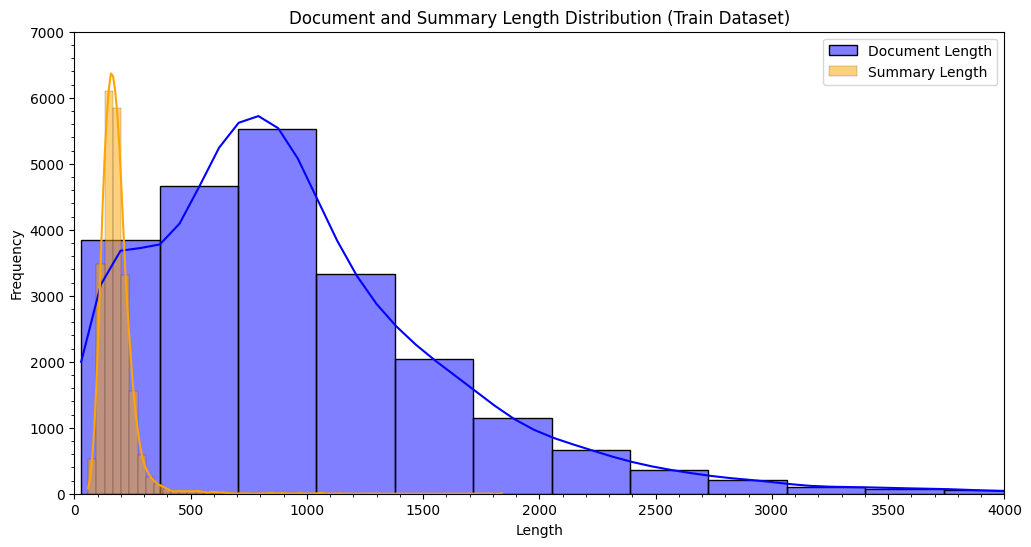

In [6]:
# 텍스트 길이와 요약 길이 분포 시각화 (train 데이터 기준)
plt.figure(figsize=(12, 6))
sns.histplot(train_df['document_length'], bins=50, kde=True, color='blue', label='Document Length')
sns.histplot(train_df['summary_length'], bins=50, kde=True, color='orange', label='Summary Length')
plt.legend()
plt.title("Document and Summary Length Distribution (Train Dataset)")
plt.xlabel("Length")
plt.ylabel("Frequency")

plt.xlim(0, 4000)
plt.ylim(0, 7000)
plt.minorticks_on()

plt.show()

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# train 데이터 로드
train_df = pd.DataFrame(dataset["train"])

# 텍스트 길이 차이 계산
train_df['document_length'] = train_df['document'].apply(len)
train_df['summary_length'] = train_df['summary'].apply(len)
train_df['length_difference'] = train_df['document_length'] - train_df['summary_length']

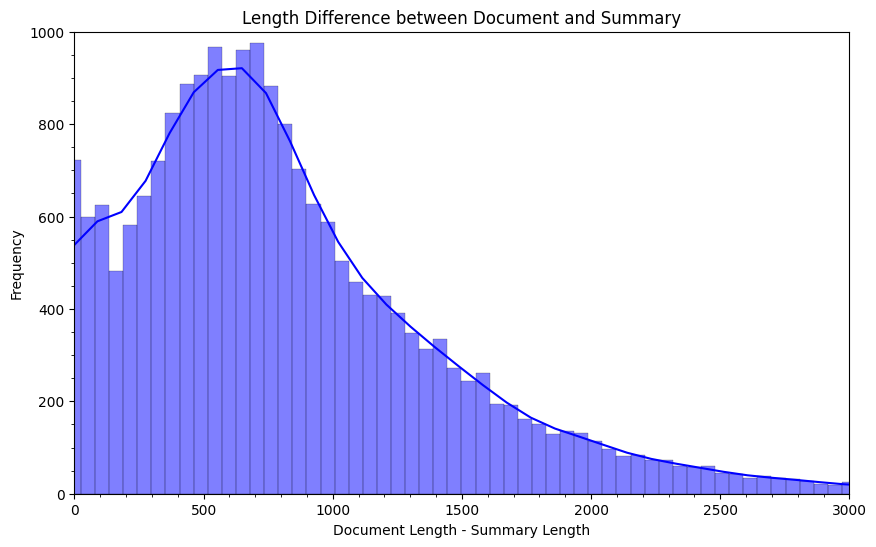

In [8]:
# 길이 차이 시각화
plt.figure(figsize=(10, 6))
sns.histplot(train_df['length_difference'], kde=True, color='blue')
plt.title('Length Difference between Document and Summary')
plt.xlabel('Document Length - Summary Length')
plt.ylabel('Frequency')

plt.xlim(0, 3000)
plt.ylim(0, 1000)
plt.minorticks_on()

plt.show()

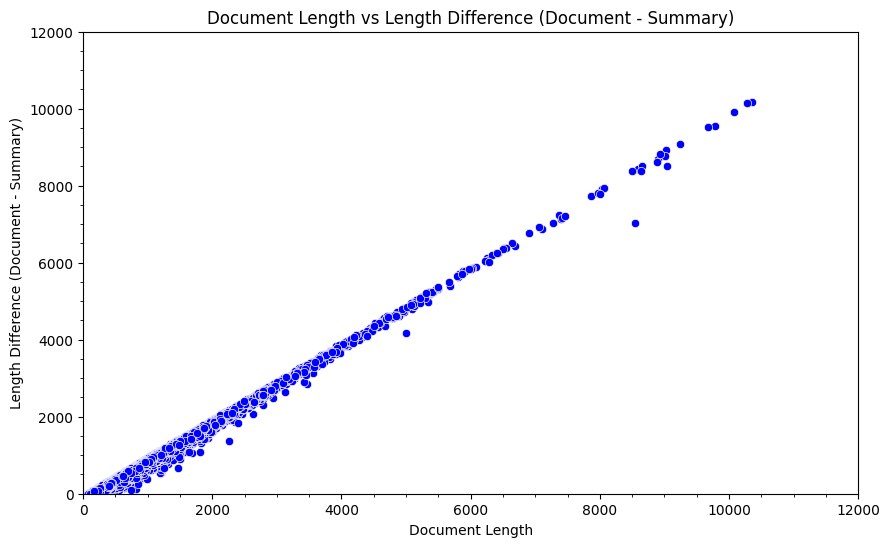

In [9]:
# 길이 차이와 요약 길이 관계 시각화
plt.figure(figsize=(10, 6))
sns.scatterplot(x=train_df['document_length'], y=train_df['length_difference'], color='blue')
plt.title('Document Length vs Length Difference (Document - Summary)')
plt.xlabel('Document Length')
plt.ylabel('Length Difference (Document - Summary)')

plt.xlim(0, 12000)
plt.ylim(0, 12000)
plt.minorticks_on()

plt.show()

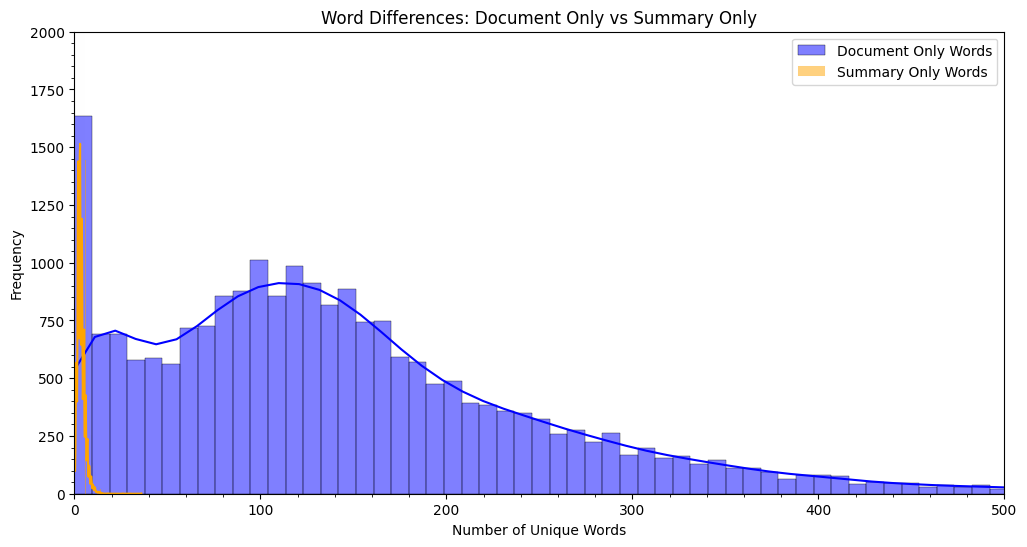

In [10]:
# 2. 단어 차이 분석
def get_unique_words(text):
    return set(text.split())

# 단어 차이 분석을 위한 데이터프레임 생성
train_df['document_words'] = train_df['document'].apply(get_unique_words)
train_df['summary_words'] = train_df['summary'].apply(get_unique_words)

# 각 샘플에 대해 공통된 단어와 차이점 분석
train_df['common_words'] = train_df.apply(lambda row: len(row['document_words'] & row['summary_words']), axis=1)
train_df['document_only_words'] = train_df.apply(lambda row: len(row['document_words'] - row['summary_words']), axis=1)
train_df['summary_only_words'] = train_df.apply(lambda row: len(row['summary_words'] - row['document_words']), axis=1)

# 단어 차이 시각화
plt.figure(figsize=(12, 6))
sns.histplot(train_df['document_only_words'], kde=True, color='blue', label='Document Only Words')
sns.histplot(train_df['summary_only_words'], kde=True, color='orange', label='Summary Only Words')
plt.legend()
plt.title('Word Differences: Document Only vs Summary Only')
plt.xlabel('Number of Unique Words')
plt.ylabel('Frequency')

plt.xlim(0, 500)
plt.ylim(0, 2000)
plt.minorticks_on()

plt.show()